In [1]:
# brute force attack

# from itertools import product

# alphabets_char_numbers = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 
# 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z','0','1','2','3', '4','5','6','7','8','9',
# '!','@','#','$','%','^','&','*','(',')','-','_','=','+',',',';',':','/','.','<','>'
# ]
#  # chars to look for

# message='$%rema'
# found=0

# for length in range(1, 10): # only do lengths of 1 + 2
#     to_attempt = product(alphabets_char_numbers, repeat=length)
#     for attempt in to_attempt:
#         if message==''.join(attempt):
#             found=1
#             print(''.join(attempt))
#             break

#     if found ==1:
#         break

In [2]:
# import numpy as np
# import matplotlib.pyplot as plt

# x = np.array([5, 4, 1, 4, 5])
# y = np.sort(x)

# plt.title("Line graph")
# plt.plot(x, y, color="red")

# plt.show()

In [11]:
import RSA
import timeit
import random
import numpy as np
import matplotlib.pyplot as plt



In [4]:
def checkPrime(num):
    if num > 1:
        for i in range(2, num//2):
            if (num % i) == 0:
                return 0 #not prime
                break
            else:
                return 1 #prime
    else:
        return 0 #not prime

In [5]:
# def getFactors(number, rangeF,rangeL):
#     factors=[]
#     for whole_number in range(rangeF, rangeL):
#         if number % whole_number == 0:
#             if(checkPrime(whole_number) ):
#                 factors.append(whole_number)
#     return factors

In [6]:
def MAth_Attack(c, n, e):
    # listOfFactors=getFactors(n,1,1000000) #search for the small prime facor
    # listOfFactors=getFactors(n,1, n) #search for the large prime facor
    #76327548707654631819288365217926676480014891572829522940868712753524331330993
    for p in range(1, n):
        if n % p == 0:
            if(checkPrime(p)):
                q=n//p
                m = RSA.RSA_Decrypt(c, p, q, e)
                c1= RSA.RSA_Encrypt(m,p, q,e)
                if c1 == c :
                    return m
    return "can't know the message"

In [9]:
def generate_two_large_primes(n):
    arr=[0,0]
    for i in range(2):
        while True:
            #n = 256
            prime_candidate = RSA.getLowLevelPrime(n)
            if not RSA.isMillerRabinPassed(prime_candidate):
                continue
            else:
                # print(n, "bit prime is: \n", prime_candidate)
                arr[i]=prime_candidate
                break
    return arr

time:  0.0001081000000340282  message:  a  n bits:  9
time:  0.0007249000000228989  message:  ab  n bits:  12
time:  0.021552299999711977  message:  abc  n bits:  16
time:  0.03410580000036134  message:  abcd  n bits:  17
time:  0.2102111000003788  message:  ZZZZZ  n bits:  20
time:  4.9662709000003815  message:  reem12  n bits:  24
time:  121.8052516000007  message:  reema12  n bits:  29
time:  15770.7749711  message:  reema123  n bits:  34


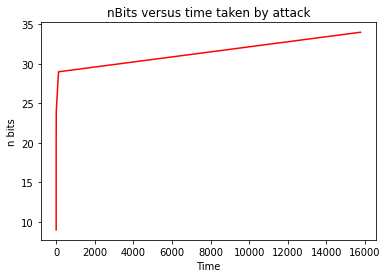

In [100]:
arr_nBits=[9,12,16,17,20,24,29,34]
arr_message=["a","ab","abc",'abcd', 'ZZZZZ','reem12','reema12','reema123']
arr_time=np.zeros(len(arr_nBits))
arr_n=np.zeros(len(arr_nBits))

for i in range(len(arr_nBits)):
    p,q=generate_two_large_primes(arr_nBits[i])
    n=pq
    arr_n[i]=n
    phi_n=(p-1)(q-1) 

    # generate e
    # exponent = 23917
    d=0
    while d != 1:
        exponent=random.randrange(2,phi_n)
        d,x,y=RSA.extended_gcd(exponent,phi_n)

    ciphertext = RSA.RSA_Encrypt(arr_message[i], n, exponent)
    #m:6 letters, n:64 bit

    start = timeit.default_timer() 
    # attacker only know n and e
    mesg_guessed_byAttacker=MAth_Attack(ciphertext, n, exponent)
    arr_time[i]= timeit.default_timer()  - start
    print('time: ',arr_time[i],' message: ',mesg_guessed_byAttacker, ' p/q bits: ',arr_nBits[i], ' n: ',arr_n[i])

plt.title("Time taken by attack versus n")
plt.plot(arr_n, arr_time, color="red")
plt.ylabel("Time")
plt.xlabel("n")
plt.show()